<a href="https://colab.research.google.com/github/pjdoucette/MAT422/blob/main/HW_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.4 Logistic Regression



---



#### Set up

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



---



###Logistic Regression

Logistic regression is a model that in its basic form uses a logistic function to model a binary dependent variable.

Given the input data of the form $\{(\alpha_i, b_i) : i = 1, \dots, n\}$ where $\alpha_i \in \mathbb{R}^d$ are the features and $b_i \in \{0, 1\}$ is the label. As before, we use a matrix representation: $A \in \mathbb{R}^{n \times d}$ has rows $\alpha_j^T$, and $b = (b_1, \dots, b_n)^T \in \{0, 1\}^n$. We wish to find a function of the features that approximates the probability of the label 1.
<br><br>
**Logit Function**

$$
\log \frac{p(\alpha; x)}{1 - p(\alpha; x)} = \alpha^T x.
$$

Rearranging this expression gives probability:

$$
p(\alpha; x) = \sigma(\alpha^T x),
$$

where $\sigma(t) = \frac{1}{1 + e^{-t}}$ is the sigmoid function.
<br><br>
**Cross-Entropy Loss**

To maximize the likelihood of the data, we assume the labels are independent given the features. The likelihood function is:

$$
L(x; A, b) = \prod_{i=1}^n p(\alpha_i; x)^{b_i} (1 - p(\alpha_i; x))^{1 - b_i}.
$$

Taking the logarithm, multiplying by $-\frac{1}{n}$, and substituting the sigmoid function, we obtain the cross-entropy loss:

$$
\ell(x; A, b) = -\frac{1}{n} \sum_{i=1}^n \left[ b_i \log(\sigma(\alpha_i^T x)) + (1 - b_i) \log(1 - \sigma(\alpha_i^T x)) \right].
$$

We aim to solve:

$$
\min_{x \in \mathbb{R}^d} \ell(x; A, b).
$$
<br><br>
**Gradient Descent**  
To use gradient descent, we compute the gradient of the loss function. Using the chain rule, the derivative of the sigmoid function is:

$$
\sigma'(t) = \sigma(t)(1 - \sigma(t)).
$$

Thus, the gradient of the cross-entropy loss is:

$$
\nabla_x \ell(x; A, b) = -\frac{1}{n} \sum_{i=1}^n (b_i - \sigma(\alpha_i^T x)) \alpha_i.
$$
<br><br>
**Hessian Loss Function**  

$$
\nabla^2_x \ell(x; A, b) = \frac{1}{n} \sum_{i=1}^n \sigma(\alpha_i^T x) (1 - \sigma(\alpha_i^T x)) \alpha_i \alpha_i^T.
$$

Since $\alpha_i \alpha_i^T$ is a symmetric matrix, the Hessian is positive semi-definite, implying that the cross-entropy loss is convex.
<br><br>
**Update Formula**  
For step size $\beta$, the update formula is:

$$
x_{k+1} = x_k + \beta \frac{1}{n} \sum_{i=1}^n (b_i - \sigma(\alpha_i^T x_k)) \alpha_i.
$$

In stochastic gradient descent, we pick a sample $I$ uniformly at random from $\{1, \dots, n\}$ and update as:

$$
x_{k+1} = x_k + \beta (b_I - \sigma(\alpha_I^T x_k)) \alpha_I.
$$


Iteration 0, Loss: 0.6769764084558867
Iteration 100, Loss: 0.27271726390588813
Iteration 200, Loss: 0.20448127390228557
Iteration 300, Loss: 0.17226128715072697
Iteration 400, Loss: 0.15258549687801232
Iteration 500, Loss: 0.13897690707094656
Iteration 600, Loss: 0.1288373149540929
Iteration 700, Loss: 0.1208975784188959
Iteration 800, Loss: 0.11445543128809259
Iteration 900, Loss: 0.10908700332751436


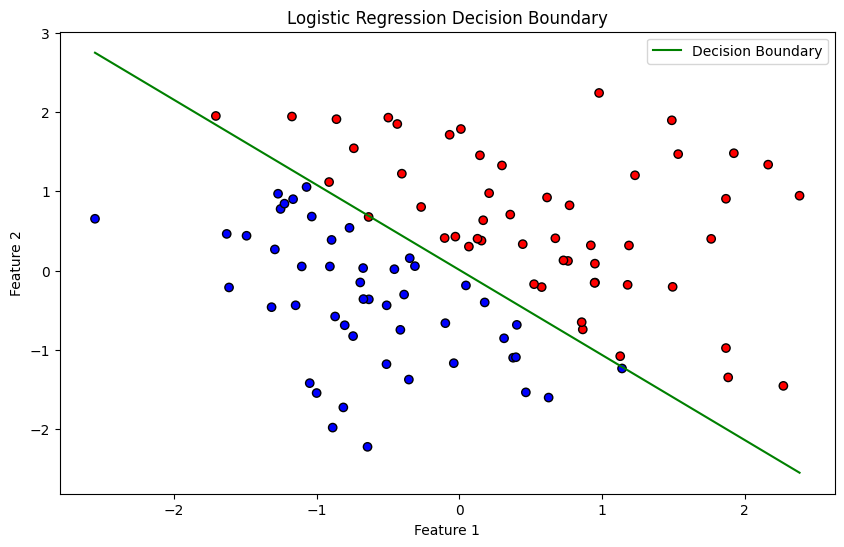

In [1]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cross-entropy loss
def compute_loss(A, b, x):
    n = len(b)
    predictions = sigmoid(A.dot(x))
    loss = -1/n * (b.T.dot(np.log(predictions)) + (1 - b).T.dot(np.log(1 - predictions)))
    return loss

# Gradient of cross-entropy loss
def compute_gradient(A, b, x):
    n = len(b)
    predictions = sigmoid(A.dot(x))
    gradient = -1/n * A.T.dot(b - predictions)
    return gradient

# Gradient descent for logistic regression
def gradient_descent(A, b, x_init, learning_rate, num_iterations):
    x = x_init
    for i in range(num_iterations):
        gradient = compute_gradient(A, b, x)
        x -= learning_rate * gradient
        if i % 100 == 0:
            loss = compute_loss(A, b, x)
            print(f"Iteration {i}, Loss: {loss}")
    return x

# Visualize the decision boundary
def plot_decision_boundary(A, b, x):
    plt.figure(figsize=(10, 6))
    plt.scatter(A[:, 1], A[:, 2], c=b, cmap='bwr', edgecolor='k')

    x1 = np.linspace(np.min(A[:, 1]), np.max(A[:, 1]), 100)
    x2 = -(x[0] + x[1] * x1) / x[2]
    plt.plot(x1, x2, color='green', label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.show()

# Generate synthetic data
np.random.seed(0)
n = 100
d = 2
A = np.random.randn(n, d)
b = (A[:, 0] + A[:, 1] > 0).astype(int)

# Add intercept
A = np.hstack([np.ones((n, 1)), A])

# Parameters
x_init = np.zeros(A.shape[1])

learning_rate = 0.1
num_iterations = 1000

# Train and Visualize
x_final = gradient_descent(A, b, x_init, learning_rate, num_iterations)
plot_decision_boundary(A, b, x_final)
